In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 13

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 13)                143       
                                                                 
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
41/41 [==============================] - ETA: 0s - loss: 2.5694 - accuracy: 0.1062
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 1s 8ms/step - loss: 2.5694 - accuracy: 0.1062 - val_loss: 2.3682 - val_accuracy: 0.2125
Epoch 2/1000
22/41 [===============>..............] - ETA: 0s - loss: 2.3674 - accuracy: 0.2095
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 4ms/step - loss: 2.3134 - accuracy: 0.2233 - val_loss: 2.1303 - val_accuracy: 0.2403
Epoch 3/1000
33/41 [=======================>......] - ETA: 0s - loss: 2.1460 - accuracy: 0.2424
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 6ms/step - loss: 2.1428 - accuracy: 0.2390 - val_loss: 1.9720 - val_accuracy: 0.2918
Epoch 4/1000
30/41 [====================>.........] - ETA: 0s - loss: 2.0501 - accuracy: 0.2583
E

38/41 [==========================>...] - ETA: 0s - loss: 1.1696 - accuracy: 0.5428
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 1.1613 - accuracy: 0.5458 - val_loss: 0.7640 - val_accuracy: 0.8170
Epoch 29/1000
23/41 [===============>..............] - ETA: 0s - loss: 1.1502 - accuracy: 0.5425
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 1.1480 - accuracy: 0.5451 - val_loss: 0.7464 - val_accuracy: 0.8199
Epoch 30/1000
38/41 [==========================>...] - ETA: 0s - loss: 1.1480 - accuracy: 0.5473
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 1.1477 - accuracy: 0.5472 - val_loss: 0.7438 - val_accuracy: 0.8379
Epoch 31/1000
32/41 [======================>.......] - ETA: 0s - loss: 1.1499 - accuracy: 0.5557
Epoch 31

29/41 [====================>.........] - ETA: 0s - loss: 1.0199 - accuracy: 0.6053
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 4ms/step - loss: 1.0159 - accuracy: 0.6026 - val_loss: 0.5757 - val_accuracy: 0.8987
Epoch 56/1000
20/41 [=============>................] - ETA: 0s - loss: 0.9901 - accuracy: 0.6160
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 4ms/step - loss: 1.0008 - accuracy: 0.6146 - val_loss: 0.5721 - val_accuracy: 0.8969
Epoch 57/1000
23/41 [===============>..............] - ETA: 0s - loss: 1.0256 - accuracy: 0.6053
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 4ms/step - loss: 1.0296 - accuracy: 0.6037 - val_loss: 0.5722 - val_accuracy: 0.8975
Epoch 58/1000
29/41 [====================>.........] - ETA: 0s - loss: 1.0026 - accuracy: 0.6202
Epoch 58

28/41 [===================>..........] - ETA: 0s - loss: 0.9284 - accuracy: 0.6604
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 3ms/step - loss: 0.9292 - accuracy: 0.6561 - val_loss: 0.5067 - val_accuracy: 0.9108
Epoch 83/1000
23/41 [===============>..............] - ETA: 0s - loss: 0.9547 - accuracy: 0.6349
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 3ms/step - loss: 0.9611 - accuracy: 0.6342 - val_loss: 0.5119 - val_accuracy: 0.9085
Epoch 84/1000
23/41 [===============>..............] - ETA: 0s - loss: 0.9500 - accuracy: 0.6318
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 4ms/step - loss: 0.9540 - accuracy: 0.6304 - val_loss: 0.5100 - val_accuracy: 0.8981
Epoch 85/1000
18/41 [============>.................] - ETA: 0s - loss: 0.9620 - accuracy: 0.6337
Epoch 85

39/41 [===========================>..] - ETA: 0s - loss: 0.9069 - accuracy: 0.6599
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.9074 - accuracy: 0.6591 - val_loss: 0.4682 - val_accuracy: 0.9131
Epoch 110/1000
36/41 [=========================>....] - ETA: 0s - loss: 0.9236 - accuracy: 0.6580
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.9217 - accuracy: 0.6574 - val_loss: 0.4699 - val_accuracy: 0.9120
Epoch 111/1000
35/41 [========================>.....] - ETA: 0s - loss: 0.9043 - accuracy: 0.6670
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.9107 - accuracy: 0.6645 - val_loss: 0.4723 - val_accuracy: 0.9016
Epoch 112/1000
38/41 [==========================>...] - ETA: 0s - loss: 0.9051 - accuracy: 0.6579
Ep

Epoch 136/1000
32/41 [======================>.......] - ETA: 0s - loss: 0.8877 - accuracy: 0.6675
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 6ms/step - loss: 0.8926 - accuracy: 0.6696 - val_loss: 0.4511 - val_accuracy: 0.9120
Epoch 137/1000
39/41 [===========================>..] - ETA: 0s - loss: 0.9067 - accuracy: 0.6617
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.9107 - accuracy: 0.6613 - val_loss: 0.4569 - val_accuracy: 0.9027
Epoch 138/1000
37/41 [==========================>...] - ETA: 0s - loss: 0.8784 - accuracy: 0.6685
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.8779 - accuracy: 0.6699 - val_loss: 0.4537 - val_accuracy: 0.9068
Epoch 139/1000
37/41 [==========================>...] - ETA: 0s - loss: 0.8710 - accu

Epoch 163/1000
29/41 [====================>.........] - ETA: 0s - loss: 0.8516 - accuracy: 0.6862
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 6ms/step - loss: 0.8608 - accuracy: 0.6821 - val_loss: 0.4359 - val_accuracy: 0.9114
Epoch 164/1000
24/41 [================>.............] - ETA: 0s - loss: 0.9043 - accuracy: 0.6729
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.8887 - accuracy: 0.6742 - val_loss: 0.4411 - val_accuracy: 0.9108
Epoch 165/1000
41/41 [==============================] - ETA: 0s - loss: 0.8470 - accuracy: 0.6875
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 4ms/step - loss: 0.8470 - accuracy: 0.6875 - val_loss: 0.4403 - val_accuracy: 0.9079
Epoch 166/1000
40/41 [============================>.] - ETA: 0s - loss: 0.8613 - accu

Epoch 190/1000
36/41 [=========================>....] - ETA: 0s - loss: 0.8319 - accuracy: 0.6988
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.8335 - accuracy: 0.6972 - val_loss: 0.4307 - val_accuracy: 0.9114
Epoch 191/1000
40/41 [============================>.] - ETA: 0s - loss: 0.8593 - accuracy: 0.6863
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.8618 - accuracy: 0.6860 - val_loss: 0.4387 - val_accuracy: 0.9108
Epoch 192/1000
39/41 [===========================>..] - ETA: 0s - loss: 0.8521 - accuracy: 0.6871
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
41/41 [==============================] - 0s 5ms/step - loss: 0.8527 - accuracy: 0.6865 - val_loss: 0.4384 - val_accuracy: 0.9102
Epoch 193/1000
37/41 [==========================>...] - ETA: 0s - loss: 0.8817 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.9178


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[5.5200160e-03 2.2122821e-02 1.3246706e-01 5.6147553e-09 3.0279349e-12
 9.0878025e-02 5.3947634e-04 7.4845678e-01 8.2749675e-06 7.4345871e-06
 1.4707938e-07 3.1260431e-08 1.4221941e-12]
7


# 混同行列

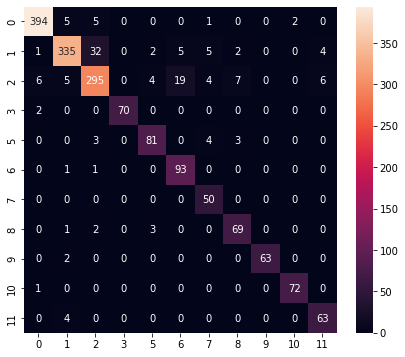

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       407
           1       0.95      0.87      0.91       386
           2       0.87      0.85      0.86       346
           3       1.00      0.97      0.99        72
           5       0.90      0.89      0.90        91
           6       0.79      0.98      0.88        95
           7       0.78      1.00      0.88        50
           8       0.85      0.92      0.88        75
           9       1.00      0.97      0.98        65
          10       0.97      0.99      0.98        73
          11       0.86      0.94      0.90        67

    accuracy                           0.92      1727
   macro avg       0.91      0.94      0.92      1727
weighted avg       0.92      0.92      0.92      1727



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\91984\AppData\Local\Temp\tmpqd3zxxjd\assets


6816

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.5200174e-03 2.2122821e-02 1.3246702e-01 5.6147567e-09 3.0279468e-12
 9.0877958e-02 5.3947646e-04 7.4845695e-01 8.2749693e-06 7.4345967e-06
 1.4707953e-07 3.1260498e-08 1.4221998e-12]
7
